# Credit Risk Modelling

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.pymnts.com/wp-content/uploads/2020/04/Feature-Image-4.jpg", width=700, height=500)

# 1. Latar Belakang

Sebagai tugas akhir saya dari masa kontrak Data Scientist Intern di ID/X Partners, saya dilibatkan dalam projek dari sebuah Lending Company. Satu hal terpenting yang harus diperhatikan di perusahaan lending adalah Credit Risk, yaitu resiko gagal bayar oleh peminjam. Untuk meminimalisir hal tersebut, saya ditugaskan untuk membuat end-to-end solution berupa Machine Learning model yang diharapkan bisa memprediksi mana calon peminjam yang baik dan mana calon peminjam yang buruk. 

# 2. Load Dataset

In [3]:
import pandas as pd
import numpy as np

loan_df = pd.read_csv('https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv')
pd.set_option('display.max_columns', None)
loan_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_df.shape

(466285, 75)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
#Cek data duplikat
duplicate_data = len(loan_df[loan_df.duplicated(keep=False)])
print(f'Jumlah data duplikat = {duplicate_data}')

Jumlah data duplikat = 0


1. Data memiliki 466285 rows, dan 75 columns.
2. Tidak terdapat observasi duplikat pada data.
3. Kolom "Unnamed: 0" merupakan kolom index dan pandas telah memiliki kolom index, kita akan membuang kolom tersebut.
4. Kolom "id" dan "member_id" merupakan kode identifikasi unik, kita telah memastikan tidak ada observasi duplikat jadi kita juga akan membuang kolom tersebut.
5. Bisa kita lihat dari dataframe info di atas, terdapat beberapa kolom yang memiliki "0 non-null" yang artinya kolom-kolom tersebut memiliki nilai missing values 100%. Kita juga akan membuang kolom-kolom tersebut.
6. Kolom "url" hanya bisa diakses oleh peminjam dan tidak memiliki nilai prediktif.
7. Kolom "desc" merupakan kolom deskriptif dan info dari kolom tersebut telah dipecah menjadi beberapa kolom.

In [7]:
df = loan_df.copy()

#Drop kolom yang tidak diperlukan
to_drop = [
    'Unnamed: 0', 'id', 'member_id', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m',
    'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
    'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'url', 'desc'
]

df.drop(to_drop, axis=1, inplace=True)

print(f'Jumlah Kolom = {len(df.columns)}')

Jumlah Kolom = 53


Setelah membuang kolom-kolom yang tidak memiliki nilai apapun kita sekarang memiliki 53 kolom. Selanjutnya, kita akan menentukan variabel target untuk algoritma machine learning kita.

# 3. Target Variable

In [8]:
df[['loan_status']].head()

,loan_status
0,Fully Paid
1,Charged Off
2,Fully Paid
3,Fully Paid
4,Current


In [9]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Variabel target kita adalah kolom "loan_status". Namun, bisa kita lihat kolom tersebut masih memiliki beberapa kategori sedangkan kita ingin mengklasifikasikan kolom tersebut menjadi 2 class, yaitu peminjam baik dan peminjam buruk.

1. Current = Peminjam membayar tepat waktu = "good_loan"
2. Fully Paid = Peminjam telah melunasi hutang = "good_loan"
3. Charged Off = Peminjam gagal membayar hutang = "bad_loan"
4. Late (31-120 days) = Peminjam terlambat membayar 31-120 hari = "bad_loan"
5. In Grace Period = Keringanan masa jatuh tempo = "bad_loan"
6. Does not meet the credit policy. Status:Fully Paid = Meskipun hutang lunas, tidak sesuai dengan kebijakan saat ini = "good_loan"
7. Late (16-30 days) = Peminjam terlambat membayar 16-30 hari = "bad_loan"
8. Default = Peminjam gagal membayar hutang = "bad_loan"
9. Does not meet the credit policy. Status:Charged Off = Peminjam gagal membayar & tidak sesuai dengan kebijakan saat ini = "bad_loan"

In [10]:
def loan_status_transform(data, col):
    data[col] = data[col].str.replace('Late (31-120 days)', '1_bad_loan', regex=False)
    data[col] = data[col].str.replace('Late (16-30 days)', '1_bad_loan', regex=False)
    data[col] = data[col].str.replace('In Grace Period', '1_bad_loan', regex=False)
    data[col] = data[col].str.replace('Does not meet the credit policy. Status:Fully Paid', '0_good_loan', regex=False)
    data[col] = data[col].str.replace('Does not meet the credit policy. Status:Charged Off', '1_bad_loan', regex=False)
    data[col] = data[col].str.replace('Current', '0_good_loan', regex=False)
    data[col] = data[col].str.replace('Fully Paid', '0_good_loan', regex=False)
    data[col] = data[col].str.replace('Charged Off', '1_bad_loan', regex=False)
    data[col] = data[col].str.replace('Default', '1_bad_loan', regex=False)
    return data[col]

In [11]:
df['loan_status'] = loan_status_transform(df, 'loan_status')

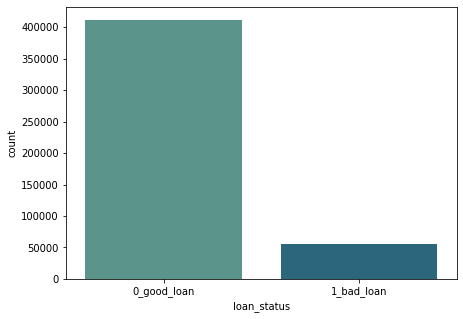

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
ax = sns.countplot(x='loan_status', data=df, palette='crest')
plt.show()

In [13]:
df['loan_status'].value_counts(normalize=True)

0_good_loan    0.881334
1_bad_loan     0.118666
Name: loan_status, dtype: float64

1. Dilihat dari probabilitas diatas, perusahaan lending sekarang mempunyai 11.8% peminjam buruk. 
2. Apakah model yang akan kita bangun mampu mengurangi presentase 11.8% tersebut?
3. Variabel target memiliki data imbalanced antara good loan dan bad loan, kita akan mengoversampling variabel minoritas tersebut agar model bekerja dengan baik.

# 4. Exploratory Data Analysis

In [14]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,0_good_loan,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1_bad_loan,n,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,0_good_loan,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0_good_loan,n,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,0_good_loan,n,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [15]:
cat_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(exclude='object')

## 4.1 Categorical Features

<Figure size 720x576 with 0 Axes>

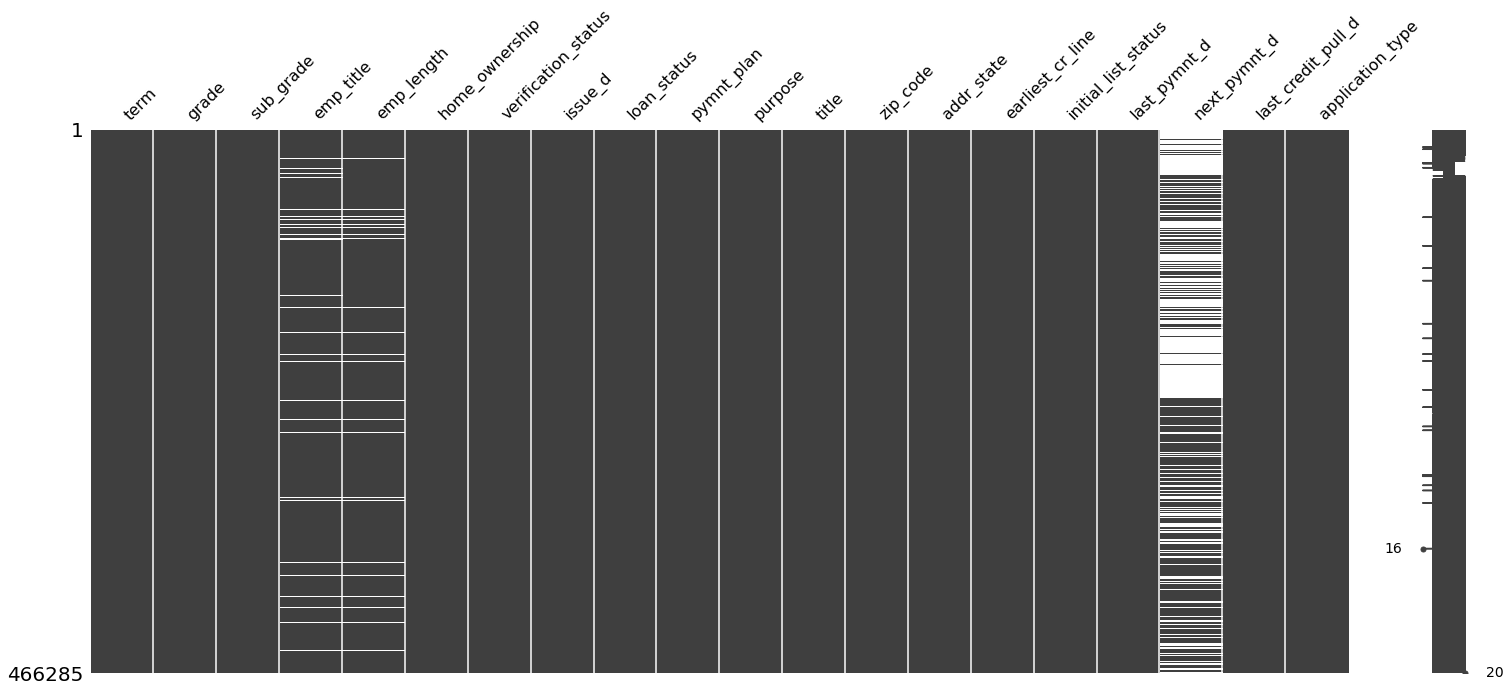

In [16]:
## Missing values categorical
import missingno as msno

plt.figure(figsize=(10,8))
msno.matrix(cat_df)
plt.show()

In [17]:
cat_df.isnull().mean()

term                   0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              0.059166
emp_length             0.045054
home_ownership         0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
pymnt_plan             0.000000
purpose                0.000000
title                  0.000043
zip_code               0.000000
addr_state             0.000000
earliest_cr_line       0.000062
initial_list_status    0.000000
last_pymnt_d           0.000806
next_pymnt_d           0.487286
last_credit_pull_d     0.000090
application_type       0.000000
dtype: float64

Terdapat 48% missing values pada kolom "next_pymnt_d" kita akan membuang kolom tersebut.

In [18]:
cat_df.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,0_good_loan,n,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,1_bad_loan,n,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,0_good_loan,n,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,0_good_loan,n,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,0_good_loan,n,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


In [19]:
cat_df.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

### a. "term"

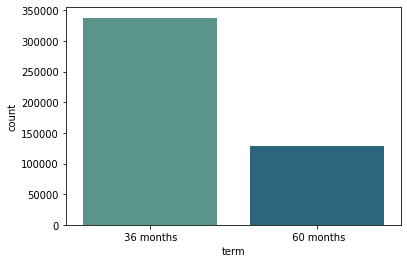

In [20]:
sns.countplot(x='term', data=df, palette='crest')
plt.show()

1. Tenor 36 bulan lebih banyak diminati daripada 60 bulan.
2. Kolom term merupakan pilihan tenor pembayaran dalam bulan dan seharusnya data bertipe numerical.

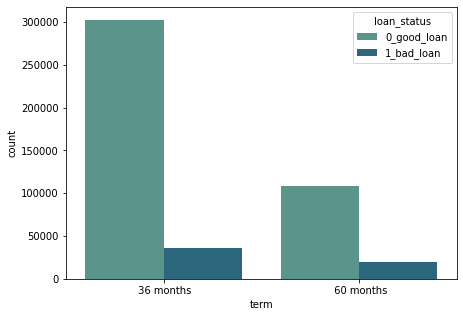

In [21]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='term', data=df, palette='crest', hue='loan_status')
plt.show()

In [22]:
term36 = 35558/(35558+305395)*100
term60 = 19774/(19774+108558)*100
print(f'Term 36 = {round(term36, 2)}% bad loan')
print(f'Term 60 = {round(term60, 2)}% bad loan')

Term 36 = 10.43% bad loan
Term 60 = 15.41% bad loan


### b. "grade"

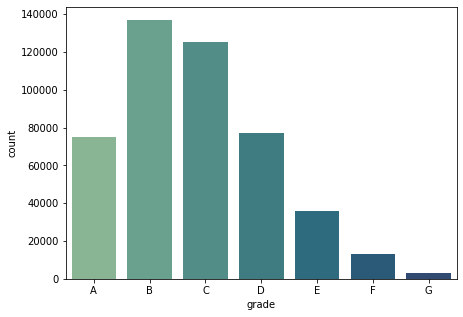

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x='grade', data=df.sort_values('grade'), palette='crest')
plt.show()

1. Kolom "grade" merupakan nilai resiko yang telah diklasifikasikan menjadi beberapa kategori oleh penyedia data.
2. Kebanyakan peminjam memiliki kategori B atau C.

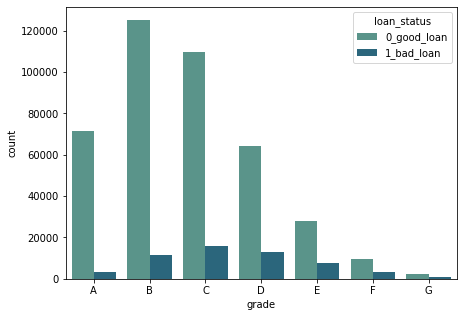

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(x='grade', data=df.sort_values('grade'), palette='crest', hue='loan_status')
plt.show()

Bisa kita lihat dari plot diatas kolom grade memiliki urutan mulai A-G. A yang memiliki presentase bad loan paling sedikit dan G yang memiliki presentase bad loan paling besar.

### c. "sub_grade"

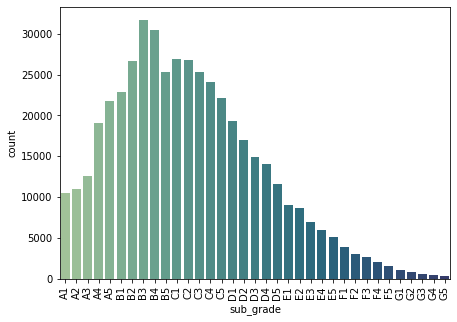

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x='sub_grade', data=df.sort_values('sub_grade'), palette='crest')
plt.xticks(rotation=90)
plt.show()

1. Kolom "sub_grade" merupakan subcategory dari kolom "grade" yang memiliki klasifikasi lebih spesifik.
2. Terdapat sedikit data pada sub_grade F & G.
3. Untuk menghindari overfitting pada model, mungkin saya akan membuang kolom "sub_grade" untuk saat ini.

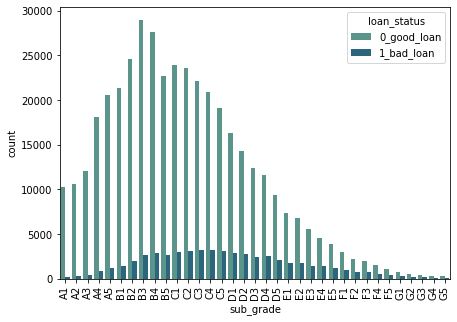

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(x='sub_grade', data=df.sort_values('sub_grade'), palette='crest', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

### d. "emp_title"

In [27]:
df['emp_title'].value_counts()[:10]

Teacher             5399
Manager             4438
Registered Nurse    2316
RN                  2204
Supervisor          1967
Project Manager     1624
Sales               1624
Owner               1527
Office Manager      1395
manager             1312
Name: emp_title, dtype: int64

Jika kita lihat terdapat job title yang memiliki arti sama namun terbagi menjadi kategori yang berbeda, contohnya "Manager" dan "manager". Kita harus melakukan transformasi data menjadi huruf kecil dahulu.

In [28]:
df['emp_title'] = df['emp_title'].str.lower()

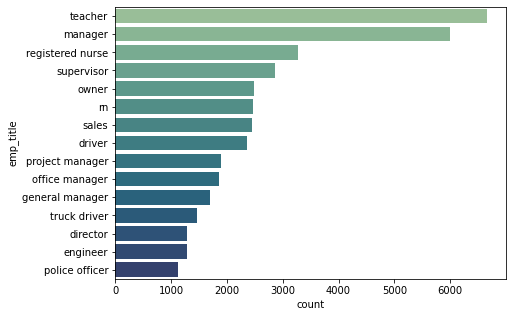

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(y='emp_title', data=df, order=df['emp_title'].value_counts()[:15].index, palette='crest')
plt.show()

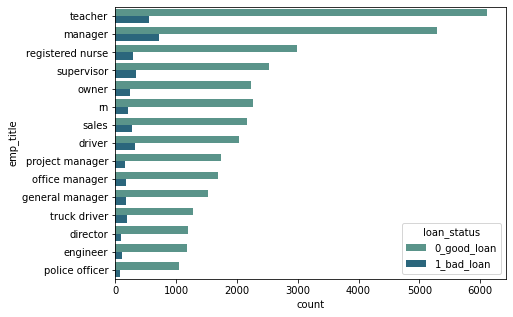

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(y='emp_title', data=df, order=df['emp_title'].value_counts()[:15].index, palette='crest', hue='loan_status')
plt.show()

1. Terdapat 183,322 job title berbeda pada dataset dan membuat setiap job title menjadi fitur akan membuat model mengalami overfitting.
2. Solusi pertama yaitu membuang kolom "emp_title" agar tidak menyebabkan *Curse of Dimensionality*.
3. Solusi kedua adalah membagi kolom menjadi 16 kategori, 15 job title dengan jumlah paling banyak dan 1 job title "other", namun kita akan memperkenalkan bias terhadap model yang mungkin bisa merugikan/menguntungkan kategori "other".
4. Hal menarik yang bisa kita lihat adalah, manager memiliki probabilitas lebih tinggi menjadi peminjam buruk daripada guru.

### e. "emp_length"

In [31]:
df['emp_length'].value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

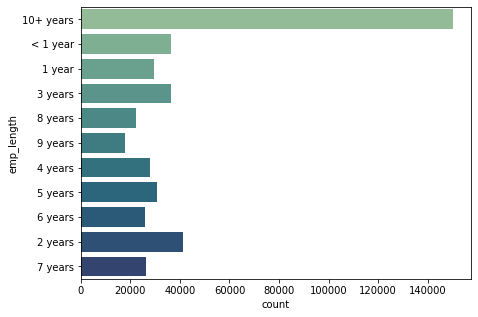

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(y='emp_length', data=df, palette='crest')
plt.show()

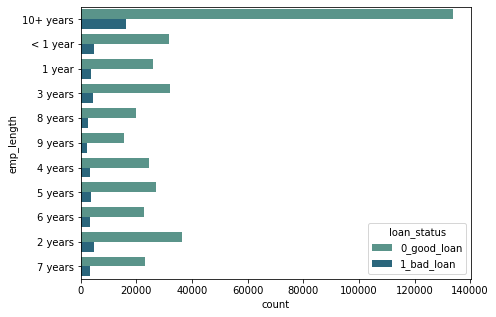

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(y='emp_length', data=df, palette='crest', hue='loan_status')
plt.show()

### f. "home_ownership"

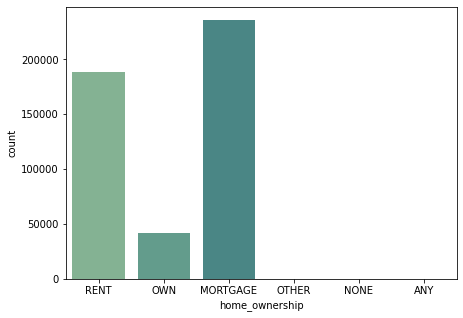

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(x='home_ownership', data=df, palette='crest')
plt.show()

In [35]:
df['home_ownership'].value_counts(normalize=True)

MORTGAGE    0.505860
RENT        0.404201
OWN         0.089439
OTHER       0.000390
NONE        0.000107
ANY         0.000002
Name: home_ownership, dtype: float64

1. Kebanyakan orang masih menyicil rumah & mengontrak. Hanya 9% yang memiliki rumah sendiri.
2. Kategori OTHER, NONE, dan ANY jika dijumlah hanya sebesar 233 dari 400,000 total data.
3. Untuk mengurangi overfit kita akan menggabung 3 kategori tersebut menjadi OTHER.
4. Solusi lain adalah menghapus kategori OTHER dan melakukan resampling atau membuang data yang memiliki kategori tersebut.

In [36]:
def transform_home_ownership(data=df['home_ownership']):
    data = data.str.replace('NONE', 'OTHER')
    data = data.str.replace('ANY', 'OTHER')
    return data

In [37]:
df['home_ownership'] = transform_home_ownership()
df['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: home_ownership, dtype: int64

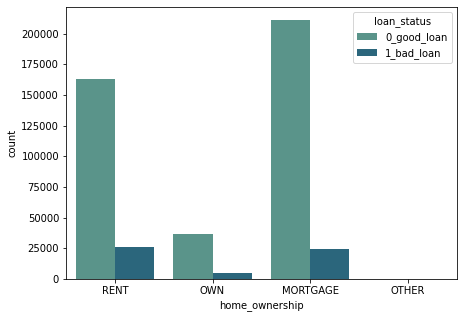

In [38]:
plt.figure(figsize=(7,5))
sns.countplot(x='home_ownership', data=df, palette='crest', hue='loan_status')
plt.show()

In [39]:
df.groupby(['home_ownership', 'loan_status']).size()

home_ownership  loan_status
MORTGAGE        0_good_loan    211167
                1_bad_loan      24708
OTHER           0_good_loan       187
                1_bad_loan         46
OWN             0_good_loan     36752
                1_bad_loan       4952
RENT            0_good_loan    162847
                1_bad_loan      25626
dtype: int64

In [40]:
mortgage = 24708/(24708+211167)*100
other = 46/(46+187)*100
own = 4952/(4952+36752)*100
rent = 25626/(25626+162847)*100

print(f'Pinjaman Buruk Mortgage = {round(mortgage, 2)}%')
print(f'Pinjaman Buruk Other = {round(other, 2)}%')
print(f'Pinjaman Buruk Own = {round(own, 2)}%')
print(f'Pinjaman Buruk Rent = {round(rent, 2)}%')

Pinjaman Buruk Mortgage = 10.48%
Pinjaman Buruk Other = 19.74%
Pinjaman Buruk Own = 11.87%
Pinjaman Buruk Rent = 13.6%


### g."verification_status"

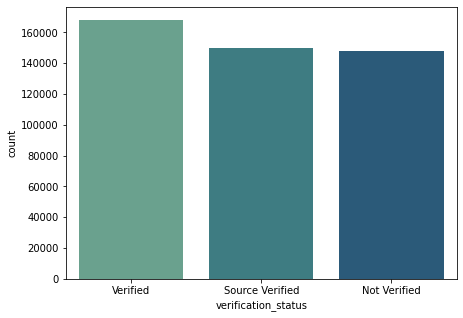

In [41]:
plt.figure(figsize=(7,5))
sns.countplot(x='verification_status', data=df, palette='crest')
plt.show()

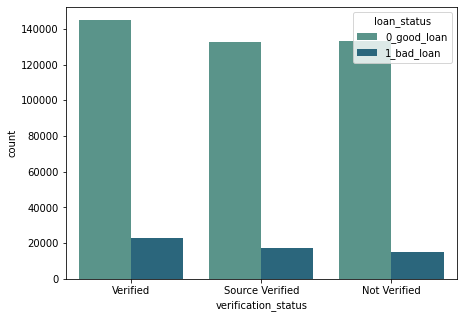

In [42]:
plt.figure(figsize=(7,5))
sns.countplot(x='verification_status', data=df, palette='crest', hue='loan_status')
plt.show()

### h. "issue_d"

In [43]:
df['issue_d'][:5]

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [44]:
#Format tanggal ke tipe date
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y').dt.to_period('M')
df['issue_d'][:5]

0    2011-12
1    2011-12
2    2011-12
3    2011-12
4    2011-12
Name: issue_d, dtype: period[M]

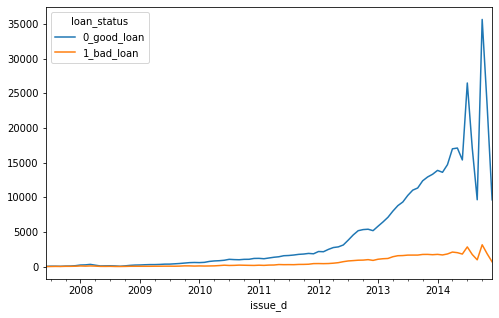

In [45]:
date_data = df.groupby(['loan_status', 'issue_d']).size().reset_index().pivot(index='issue_d', columns='loan_status', values=0)
date_data.plot(kind='line', figsize=(8,5))
plt.show()

1. Terdapat spike pada data yang mungkin dikarenakan sebagian data di tahun tersebut belum sepenuhnya terekap dalam data.
2. Terlihat trend naik pada jumlah peminjaman sejak tahun 2012 dan sedikit trend naik pada jumlah peminjaman buruk, yang artinya perusahaan telah berupaya semaksimal mungkin untuk menekan jumlah peminjaman buruk.
3. Hal lain yang bisa kita eksplor dari kolom ini adalah trend berdasarkan bulan.
4. Selain itu kolom ini akan dibuang karena tidak adanya fitur untuk masa mendatang dan training pada kolom ini akan menjadi sia sia saja.

### i. "issue_m"

In [46]:
df['issue_m'] = df['issue_d'].dt.month
df['issue_m']

0         12
1         12
2         12
3         12
4         12
          ..
466280     1
466281     1
466282     1
466283     1
466284     1
Name: issue_m, Length: 466285, dtype: int64

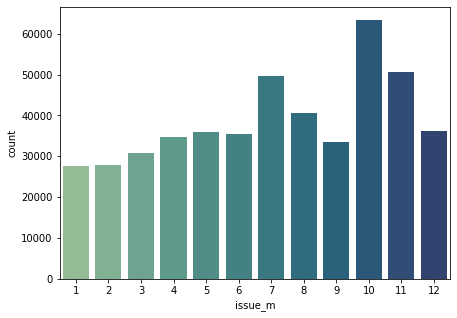

In [47]:
plt.figure(figsize=(7,5))
sns.countplot(x='issue_m', data=df, palette='crest')
plt.show()

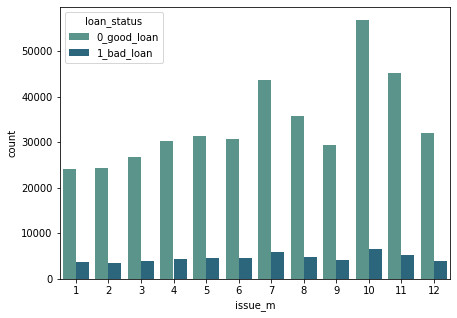

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(x='issue_m', data=df, palette='crest', hue='loan_status')
plt.show()

Terjadi peningkatan pinjaman pada bulan 10 dan 11, hal ini mungkin terkait dengan libur natal dan akhir tahun. Banyak orang harus menutup hutang hutang mereka sebelum akhir tahun & membeli baju, dll.

### j. "pymnt_plan"

In [49]:
df['pymnt_plan'].value_counts()

n    466276
y         9
Name: pymnt_plan, dtype: int64

Terdapat 466276 n dan 9 y. Tidak ada nilai prediktif yang bisa diberikan oleh kolom ini. Untuk itu, kita harus membuang kolom ini agar model tidak menangkap pattern aneh dan membuat model overfit.

### k. "purpose"

In [50]:
df['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

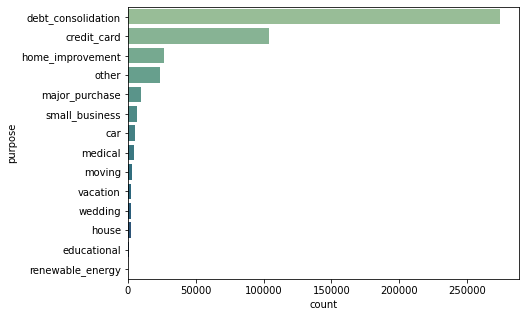

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(y='purpose', data=df, palette='crest', order=df['purpose'].value_counts().sort_values(ascending=False).index)
plt.show()

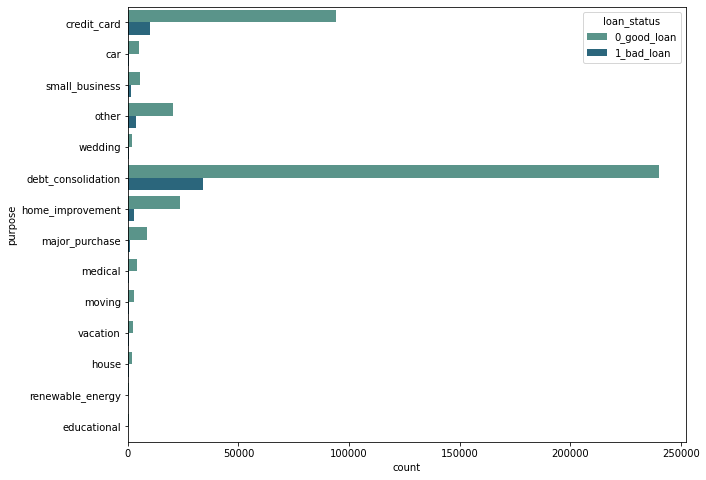

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(y='purpose', data=df, palette='crest', hue='loan_status')
plt.show()

Dari plot diatas kita bisa melihat bahwa kebanyakan peminjaman buruk dikarenakan peminjam ingin melunasi hutang lain & kartu kredit. Hal ini masuk akal, karena banyak orang yang hanya meminjam uang untuk menutup hutang namun tidak punya penghasilan untuk membayar kembali.

### l. "title"

In [53]:
df['title'].value_counts()

Debt consolidation                   164075
Credit card refinancing               62275
Debt Consolidation                    15760
Home improvement                      14849
Other                                 12713
                                      ...  
Credit Card Clearance                     1
credit repayment                          1
medical bills/credit card payoff          1
One Time Only Relief!                     1
Paying off the car and some bills         1
Name: title, Length: 63099, dtype: int64

Kolom ini mempunyai isi yang sama dengan kolom "purpose", kita akan membuang kolom ini.

### m. "zip_code"

In [54]:
df['zip_code'].value_counts()

945xx    5304
112xx    5102
750xx    5013
606xx    4696
100xx    4391
         ... 
204xx       1
502xx       1
514xx       1
049xx       1
901xx       1
Name: zip_code, Length: 888, dtype: int64

1. Asumsi terhadap kolom ini adalah model bisa mengkelompokkan mana area yang rawan pinjaman buruk dan mana yang baik.
2. Terdapat 888 zip code di dataset ini, solusi pertama adalah membuat kategori Other untuk zip code yang memiliki jumlah sedikit.
3. Solusi kedua adalah tidak menggunakan fitur ini.

### n. "addr_state"

In [55]:
df['addr_state'].value_counts()

CA    71450
NY    40242
TX    36439
FL    31637
IL    18612
NJ    18061
PA    16424
OH    15237
GA    14975
VA    14222
NC    12682
MI    11549
MA    11072
MD    10974
AZ    10712
WA    10517
CO     9739
MN     8158
MO     7508
CT     7204
IN     6525
NV     6519
TN     5984
OR     5949
WI     5911
AL     5853
SC     5583
LA     5489
KY     4438
KS     4190
OK     4117
AR     3488
UT     3428
NM     2588
HI     2487
WV     2412
NH     2232
RI     2050
DC     1426
MT     1396
DE     1272
AK     1251
MS     1226
WY     1128
SD      980
VT      905
IA       14
NE       14
ID       12
ME        4
Name: addr_state, dtype: int64

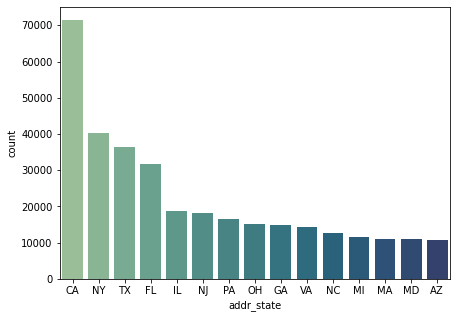

In [56]:
plt.figure(figsize=(7,5))
sns.countplot(x='addr_state', data=df, order=df['addr_state'].value_counts()[:15].index, palette='crest')
plt.show()

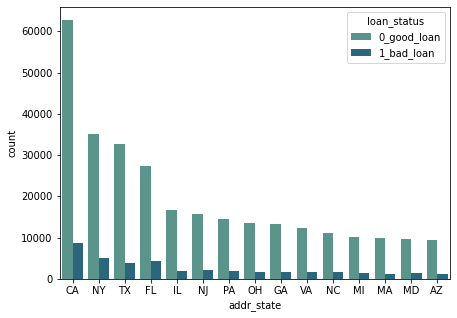

In [57]:
plt.figure(figsize=(7,5))
sns.countplot(x='addr_state', data=df, order=df['addr_state'].value_counts()[:15].index, palette='crest', hue='loan_status')
plt.show()

### o. "earliest_cr_line"

In [58]:
df['earliest_cr_line'].value_counts()

Oct-00    3674
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Jul-55       1
Feb-57       1
Oct-54       1
May-53       1
Nov-56       1
Name: earliest_cr_line, Length: 664, dtype: int64

In [59]:
#Format tanggal ke tipe date
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y').dt.to_period('Y')
df['earliest_cr_line'][:5]

0    1985
1    1999
2    2001
3    1996
4    1996
Name: earliest_cr_line, dtype: period[A-DEC]

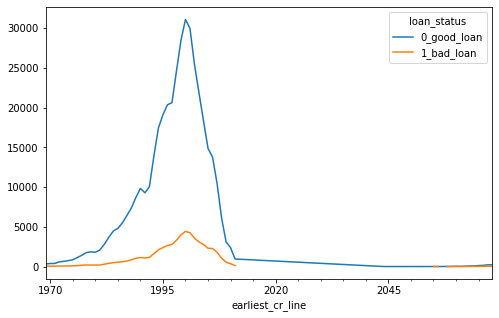

In [60]:
date_data = df.groupby(['loan_status', 'earliest_cr_line']).size().reset_index().pivot(index='earliest_cr_line', columns='loan_status', values=0)
date_data.plot(kind='line', figsize=(8,5))
plt.show()

Terdapat error pada kolom ini dikarenakan, dataset adalah observasi tahun 2007-2014. Yang artinya transaksi paling baru seharusnya berada pada tahun 2014. Kita harus mengganti angka yang melebihi tahun 2014 menjadi missing values. Untuk saat ini kita akan drop kolom ini.

### p. "initial_list_status"

In [61]:
df['initial_list_status'].value_counts()

f    303005
w    163280
Name: initial_list_status, dtype: int64

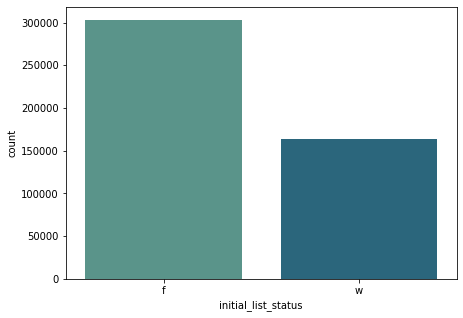

In [62]:
plt.figure(figsize=(7,5))
sns.countplot(x='initial_list_status', data=df, palette='crest')
plt.show()

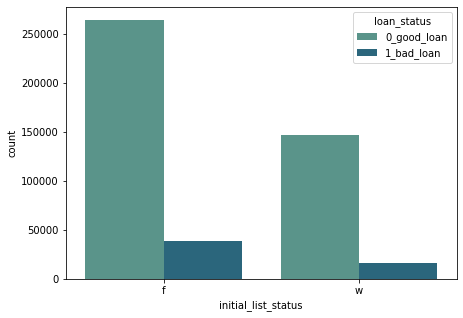

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(x='initial_list_status', data=df, palette='crest', hue='loan_status')
plt.show()

### q. "last_pymnt_d"

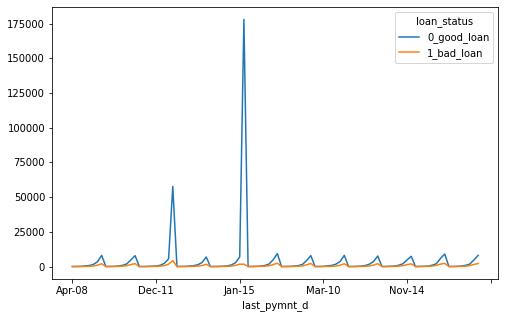

In [64]:
date_data = df.groupby(['loan_status', 'last_pymnt_d']).size().reset_index().pivot(index='last_pymnt_d', columns='loan_status', values=0)
date_data.plot(kind='line', figsize=(8,5))
plt.show()

### r. "next_pymnt_d"

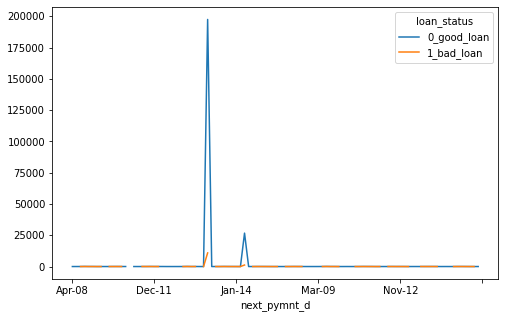

In [65]:
date_data = df.groupby(['loan_status', 'next_pymnt_d']).size().reset_index().pivot(index='next_pymnt_d', columns='loan_status', values=0)
date_data.plot(kind='line', figsize=(8,5))
plt.show()

### s. "last_credit_pull_d"

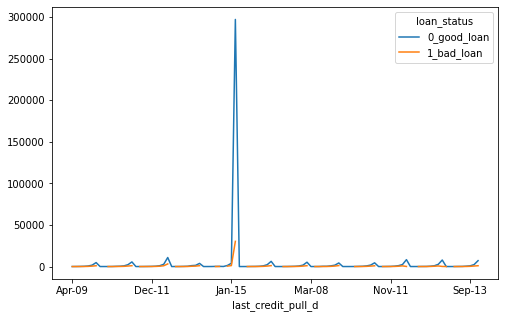

In [66]:
date_data = df.groupby(['loan_status', 'last_credit_pull_d']).size().reset_index().pivot(index='last_credit_pull_d', columns='loan_status', values=0)
date_data.plot(kind='line', figsize=(8,5))
plt.show()

### t. "application_type"

In [67]:
df['application_type'].value_counts()

INDIVIDUAL    466285
Name: application_type, dtype: int64

Kolom ini hanya memiliki 1 values, mari kita buang.

## 4.2 Removing Multicollinearity

Setelah melihat beberapa data, terdapat kolom-kolom yang memiliki nilai yang sama persis seperti "loan_amnt" dan "funded_amnt". Hal ini disebut multicollinearity dan kolom tersebut tidak memiliki informasi lebih, untuk itu kita perlu mencari dan membuang kolom-kolom tersebut.

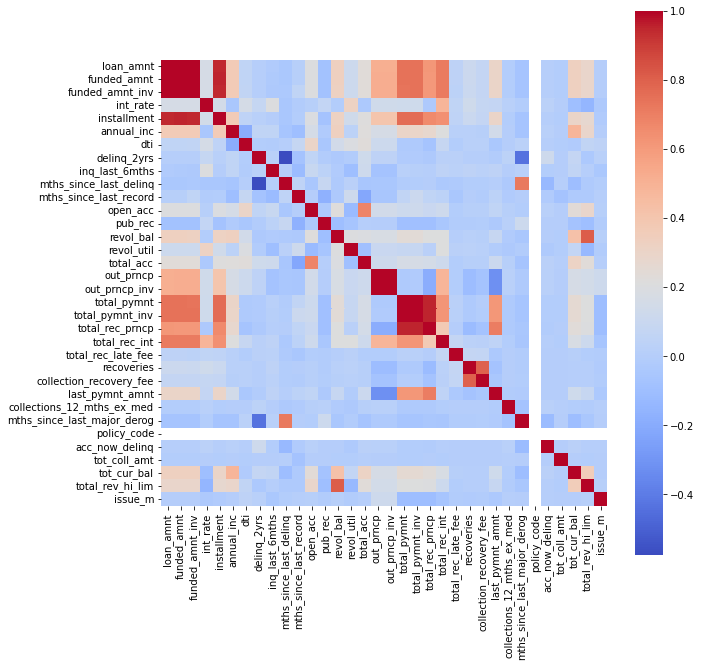

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True, cmap='coolwarm')
plt.show()

Dari plot heatmap diatas ada beberapa hal yang bisa kita lihat:
1. Kolom "policy_code" hanya memiliki single value dan tidak memiliki korelasi apapun dengan variabel lain.
2. Kolom "loan_amnt", "funded_amnt", "funded_amnt_inv", "installment" memiliki korelasi koefisien 1, yang artinya variabel-variabel tersebut meiliki nilai yang sama dan tidak memiliki informasi apapun. Kita akan membuang 3 kolom redundan tersebut dan menyisahkan "loan_amnt".
3. Hal yang sama terjadi dengan kolom "out_prncp" dan "out_prncp_inv".
4. Juga, "total_pymnt", "total_pymnt_inv" dan "total_rec_prncp".
5. Terdapat variabel lain yang memiliki multicollinearity lumayan tinggi, tetapi untuk saat ini kita hanya akan membuang yang memiliki nilai koefisien 1.

## 4.3 Numerical Features

In [69]:
num_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,1,0.0,NaN,NaN,NaN


In [70]:
num_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

In [71]:
for x in num_df.columns:
    print(x, '=', len(num_df[x].unique()))

loan_amnt = 1352
funded_amnt = 1354
funded_amnt_inv = 9854
int_rate = 506
installment = 55622
annual_inc = 31902
dti = 3997
delinq_2yrs = 25
inq_last_6mths = 29
mths_since_last_delinq = 146
mths_since_last_record = 124
open_acc = 63
pub_rec = 27
revol_bal = 58142
revol_util = 1270
total_acc = 113
out_prncp = 135665
out_prncp_inv = 141189
total_pymnt = 351609
total_pymnt_inv = 347659
total_rec_prncp = 172713
total_rec_int = 270249
total_rec_late_fee = 5808
recoveries = 22773
collection_recovery_fee = 20275
last_pymnt_amnt = 198194
collections_12_mths_ex_med = 10
mths_since_last_major_derog = 163
policy_code = 1
acc_now_delinq = 7
tot_coll_amt = 6322
tot_cur_bal = 220691
total_rev_hi_lim = 14613


Kolom policy code hanya mempunyai 1 value, oleh karena itu kita akan drop kolom tersebut.

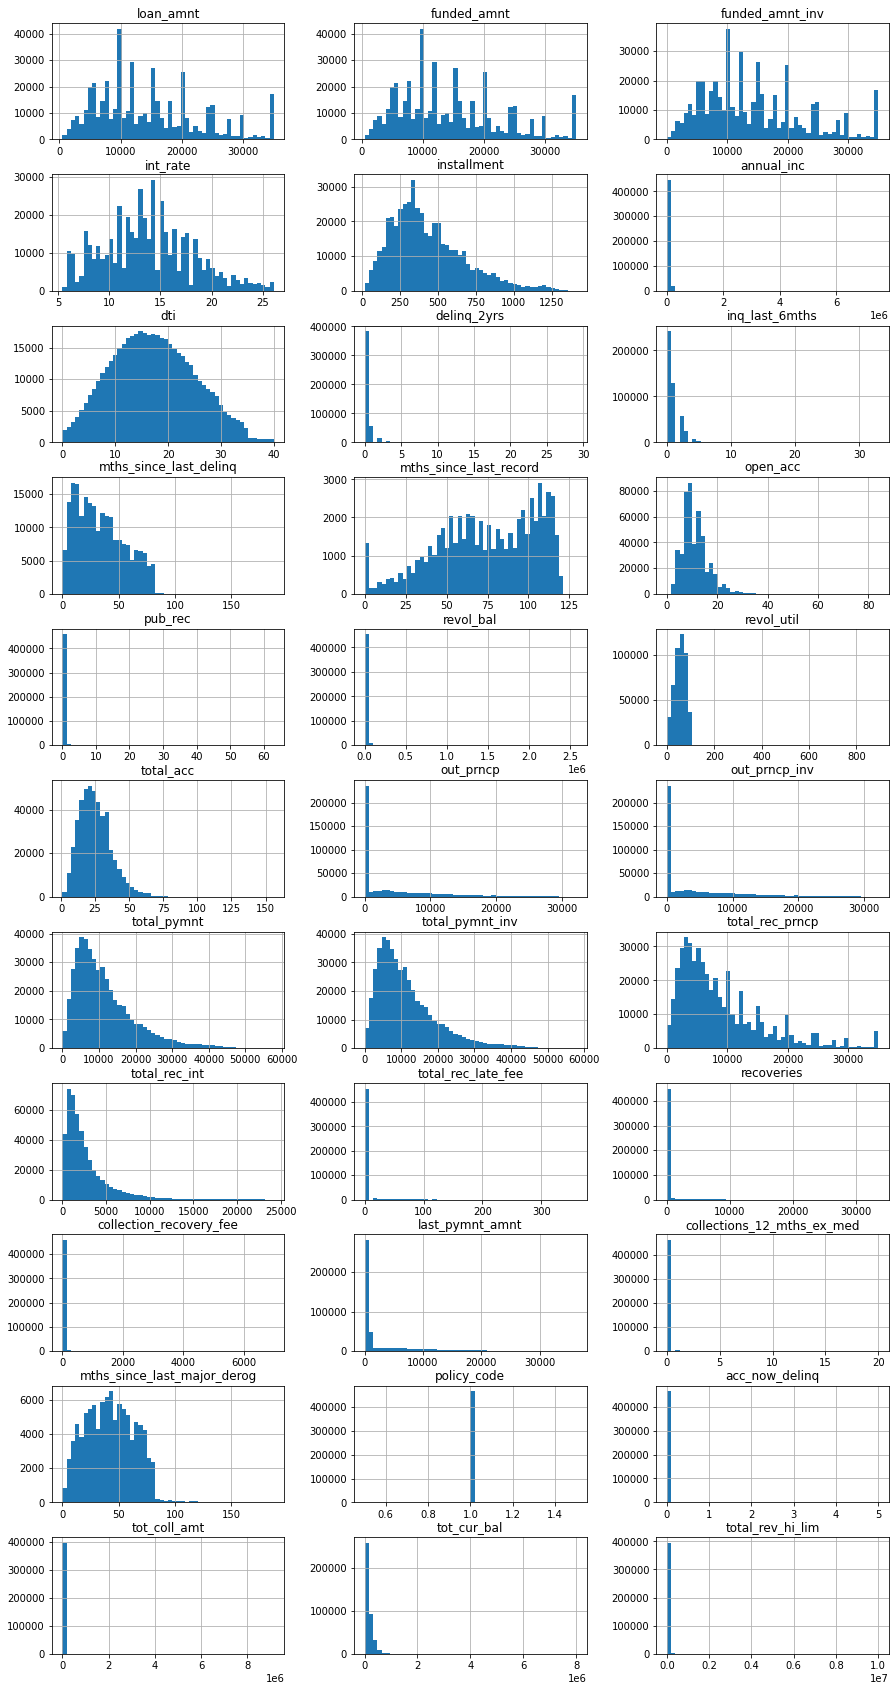

In [72]:
num_df = num_df
num_df.hist(bins=50, layout=(11,3), figsize=(15,30))
plt.show()

In [73]:
num_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


<Figure size 720x576 with 0 Axes>

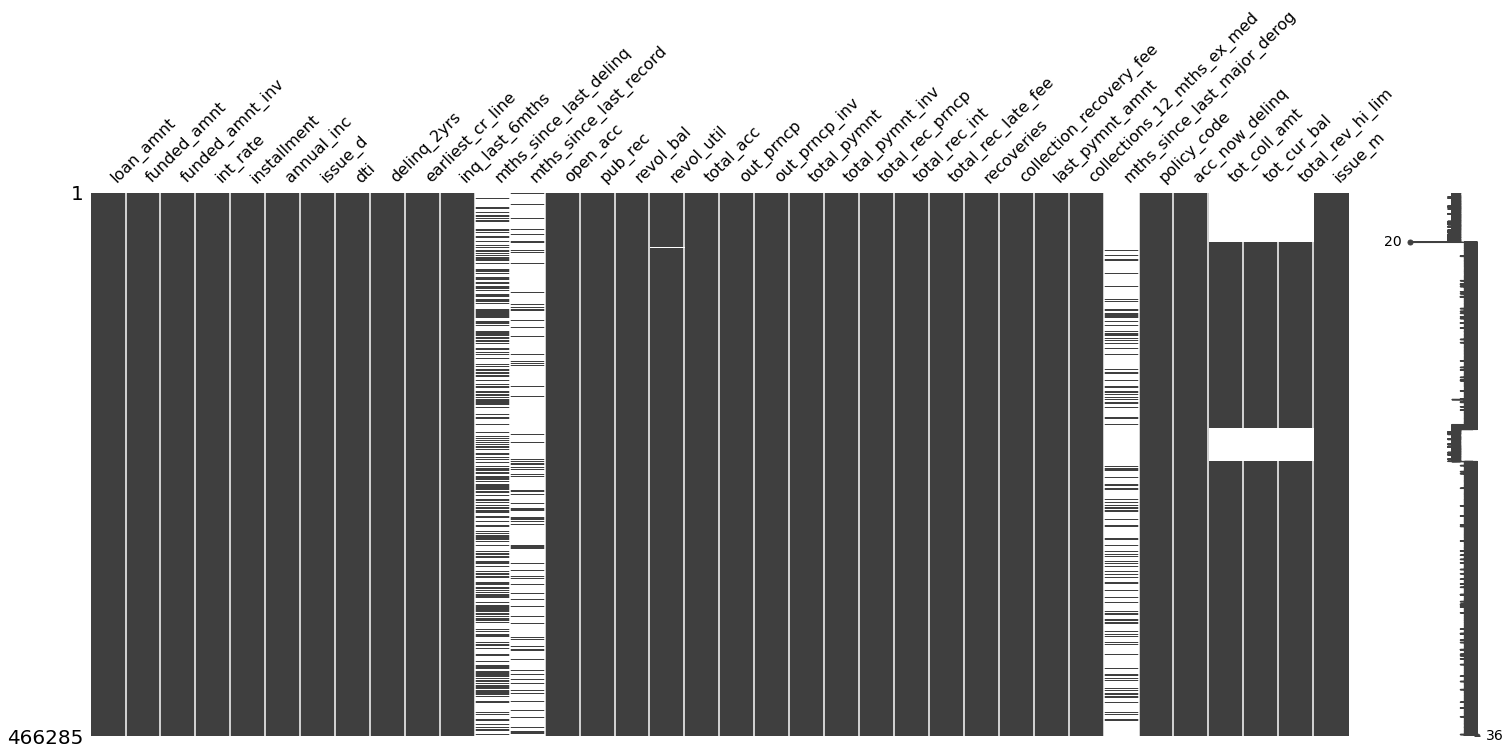

In [74]:
## Missing values numerical

plt.figure(figsize=(10,8))
msno.matrix(df.select_dtypes(exclude='object'))
plt.show()

In [75]:
num_df1 = df.select_dtypes(exclude='object')
num_df1.isnull().mean()

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
int_rate                       0.000000
installment                    0.000000
annual_inc                     0.000009
issue_d                        0.000000
dti                            0.000000
delinq_2yrs                    0.000062
earliest_cr_line               0.000062
inq_last_6mths                 0.000062
mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
open_acc                       0.000062
pub_rec                        0.000062
revol_bal                      0.000000
revol_util                     0.000729
total_acc                      0.000062
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000


1. Terdapat lebih dari 50% missing values pada kolom 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog' kita akan membuang kolom tersebut agar data kita tidak tercemar.
2. Untuk missing values yang lain kita akan mengimpute menggunakan median dikarenakan distribusi kolom-kolom tersebut skewed ke kanan, mengakibatkan mean geser ke angka yang lebih tinggi.

# 5. Data Preprocessing

In [76]:
to_drop = [
    'sub_grade', 'emp_title', 'issue_d', 'pymnt_plan',
    'title', 'zip_code', 'earliest_cr_line', 'last_pymnt_d',
    'next_pymnt_d', 'last_credit_pull_d', 'application_type',
    'funded_amnt', 'funded_amnt_inv', 'installment', 
    'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp',
    'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog'
]

df.drop(to_drop, axis=1, inplace=True)

In [77]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_m
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Verified,0_good_loan,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,5861.071414,861.07,0.00,0.00,0.00,171.62,0.0,1,0.0,NaN,NaN,NaN,12
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,1_bad_loan,car,GA,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,1008.710000,435.17,0.00,117.08,1.11,119.66,0.0,1,0.0,NaN,NaN,NaN,12
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Not Verified,0_good_loan,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,3003.653644,603.65,0.00,0.00,0.00,649.91,0.0,1,0.0,NaN,NaN,NaN,12
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Source Verified,0_good_loan,other,CA,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,12226.302210,2209.33,16.97,0.00,0.00,357.48,0.0,1,0.0,NaN,NaN,NaN,12
4,3000,60 months,12.69,B,1 year,RENT,80000.0,Source Verified,0_good_loan,other,OR,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,3242.170000,1009.07,0.00,0.00,0.00,67.79,0.0,1,0.0,NaN,NaN,NaN,12


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  445277 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466281 non-null  float64
 7   verification_status         466285 non-null  object 
 8   loan_status                 466285 non-null  object 
 9   purpose                     466285 non-null  object 
 10  addr_state                  466285 non-null  object 
 11  dti                         466285 non-null  float64
 12  delinq_2yrs                 466256 non-null  float64
 13  inq_last_6mths

In [79]:
df_sample = df.head(n=10000)

In [80]:
X = df_sample.drop('loan_status', axis=1).copy()
y = df_sample['loan_status'].copy()

In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, ..., 0, 0, 1])

In [82]:
list(le.classes_)

['0_good_loan', '1_bad_loan']

## 5.1 Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 6. Model Selection

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
                                ('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())
])

categoric_transformer = Pipeline([
                                  ('imputer', SimpleImputer(strategy='most_frequent')),
                                  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = [
                    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
                    'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                    'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
                    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                    'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
                    'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'issue_m'
]

categoric_features = [col for col in X.select_dtypes(include='object').columns]

preprocessor = ColumnTransformer([
    ('numeric', numeric_transformer, numeric_features),
    ('categoric', categoric_transformer, categoric_features)
])

Defined 53 models
Defined 107 models
>logistic: 0.909 (+/-0.020)
>ridge-0.1: 0.678 (+/-0.036)
>ridge-0.2: 0.678 (+/-0.036)
>ridge-0.3: 0.678 (+/-0.036)
>ridge-0.4: 0.678 (+/-0.036)
>ridge-0.5: 0.678 (+/-0.036)
>ridge-0.6: 0.678 (+/-0.036)
>ridge-0.7: 0.678 (+/-0.036)
>ridge-0.8: 0.678 (+/-0.036)
>ridge-0.9: 0.678 (+/-0.036)
>ridge-1.0: 0.677 (+/-0.036)
>sgd: 0.931 (+/-0.018)
>pa: 0.915 (+/-0.018)
>knn-1: 0.511 (+/-0.024)
>knn-2: 0.472 (+/-0.032)
>knn-3: 0.540 (+/-0.041)
>knn-4: 0.492 (+/-0.044)
>knn-5: 0.542 (+/-0.043)
>knn-6: 0.504 (+/-0.046)
>knn-7: 0.541 (+/-0.050)
>knn-8: 0.501 (+/-0.047)
>knn-9: 0.522 (+/-0.045)
>knn-10: 0.481 (+/-0.050)
>knn-11: 0.519 (+/-0.051)
>knn-12: 0.478 (+/-0.046)
>knn-13: 0.508 (+/-0.048)
>knn-14: 0.477 (+/-0.042)
>knn-15: 0.505 (+/-0.037)
>knn-16: 0.466 (+/-0.034)
>knn-17: 0.490 (+/-0.035)
>knn-18: 0.462 (+/-0.029)
>knn-19: 0.483 (+/-0.033)
>knn-20: 0.454 (+/-0.036)
>cart: 0.935 (+/-0.020)
>extra: 0.627 (+/-0.055)
>svml: 0.933 (+/-0.012)
>svmp: 0.732 (+/

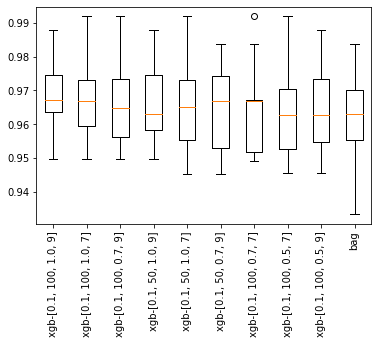

In [86]:
# binary classification spot check script
import warnings
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
 
# load the dataset, returns X and y elements
def load_dataset():
	return make_classification(n_samples=1000, n_classes=2, random_state=1)
 
# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models
 
# define gradient boosting models
def define_gbm_models(models=dict(), use_xgb=True):
	# define config ranges
	rates = [0.001, 0.01, 0.1]
	trees = [50, 100]
	ss = [0.5, 0.7, 1.0]
	depth = [3, 7, 9]
	# add configurations
	for l in rates:
		for e in trees:
			for s in ss:
				for d in depth:
					cfg = [l, e, s, d]
					if use_xgb:
						name = 'xgb-' + str(cfg)
						models[name] = XGBClassifier(learning_rate=l, n_estimators=e, subsample=s, max_depth=d)
					else:
						name = 'gbm-' + str(cfg)
						models[name] = GradientBoostingClassifier(learning_rate=l, n_estimators=e, subsample=s, max_depth=d)
	print('Defined %d models' % len(models))
	return models
 
# create a feature preparation pipeline for a model
def make_pipeline(model):
  steps = list()
  steps.append(('preprocessor', preprocessor))
  steps.append(('model', model))
  pipeline = Pipeline(steps=steps)
  return pipeline
 
# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores
 
# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores
 
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='f1'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results
 
# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	plt.boxplot(scores, labels=names)
	_, labels = plt.xticks()
	plt.setp(labels, rotation=90)
	plt.savefig('spotcheck.png')
 
# get model list
models = define_models()
# add gbm models
models = define_gbm_models(models)
# evaluate models
results = evaluate_models(X_train, y_train, models)
# summarize results
summarize_results(results)

# 7. All Features vs Numerical Only

## 7.1 Train Model menggunakan semua fitur

In [86]:
X = df.drop('loan_status', axis=1).copy()
y = df['loan_status'].copy()

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

xgb_pipeline = Pipeline([
                         ('preprocessor', preprocessor),
                         ('xgb_clf', XGBClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, max_depth=9))
])

xgb_cv = cross_val_score(xgb_pipeline, X_train, y_train, scoring='f1', cv=3)

In [91]:
xgb_model = xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

print(f'Train Score = {np.mean(xgb_cv)}')
print(f'Test Score = {f1}')

Train Score = 0.8868065751069842
Test Score = 0.893724847220152


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


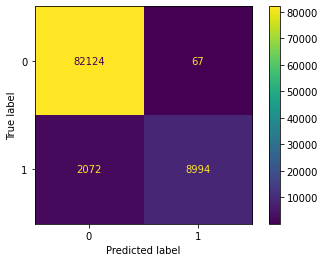

In [92]:
from sklearn.metrics import plot_confusion_matrix, recall_score, precision_score, f1_score

plot_confusion_matrix(xgb_model, X_test, y_test)

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     82191
           1       0.99      0.81      0.89     11066

    accuracy                           0.98     93257
   macro avg       0.98      0.91      0.94     93257
weighted avg       0.98      0.98      0.98     93257



## 7.2 Train Model hanya menggunakan fitur numerical

In [97]:
numeric = df.select_dtypes(exclude='object').copy()

X = numeric.copy()
y = df['loan_status'].copy()

In [98]:
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

numeric_transformer = Pipeline([
                                ('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())
])

numeric_features = [
                    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
                    'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                    'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
                    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                    'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
                    'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'issue_m'
]

preprocessor = ColumnTransformer([
    ('numeric', numeric_transformer, numeric_features)
])

xgb_pipeline = Pipeline([
                         ('preprocessor', preprocessor),
                         ('xgb_clf', XGBClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, max_depth=9))
])

xgb_cv = cross_val_score(xgb_pipeline, X_train, y_train, scoring='f1', cv=3)

In [99]:
xgb_model = xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f'Train Score = {np.mean(xgb_cv)}')
print(f'Test Score = {f1}')

Train Score = 0.8848725024214014
Test Score = 0.889884508164078


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


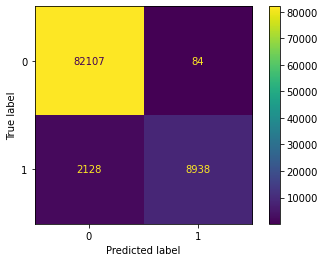

In [100]:
from sklearn.metrics import plot_confusion_matrix, recall_score, precision_score, f1_score

plot_confusion_matrix(xgb_model, X_test, y_test)

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     82191
           1       0.99      0.81      0.89     11066

    accuracy                           0.98     93257
   macro avg       0.98      0.90      0.94     93257
weighted avg       0.98      0.98      0.98     93257



1. Fitur kategorikal setelah One Hot Encoding berjumlah -+ 70 kolom.
2. Model yang tidak menggunakan fitur kategorikal hanya membuat F1-score turun sebesar 0.4%
3. Recall score tetap di angka 81%.
4. Menggunakan model tanpa fitur kategorikal membuat kompleksitas model menurun dan menurunkan resiko overfitting.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


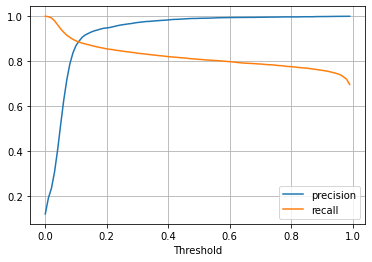

In [230]:
predictions = xgb_model.predict_proba(X_test)

thresholds = np.linspace(0, 1, 101)
precision_scores = []
recall_scores = []
for threshold in thresholds:
    adjusted_predictions = [1 if p > threshold else 0 for p in predictions[:,1]]
    precision_scores.append(precision_score(y_test, adjusted_predictions))
    recall_scores.append(recall_score(y_test, adjusted_predictions))
plt.plot(thresholds[:-1], precision_scores[:-1], label="precision")
plt.plot(thresholds[:-1], recall_scores[:-1], label="recall")
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.show()

In [228]:
df['loan_status'].value_counts(normalize=True)

0_good_loan    0.881334
1_bad_loan     0.118666
Name: loan_status, dtype: float64

Saat ini perusahaan memiliki recall sebesar 88.1%. Setidaknya kita harus memilih threshold dengan recall sebesar angka tersebut.

In [229]:
df_dict = {
    'precision':precision_scores,
    'recall':recall_scores,
    'threshold':thresholds
}

df_pr = pd.DataFrame(df_dict)
df_pr.head(11)

,precision,recall,threshold
0,0.118661,1.000000,0.00
1,0.189062,0.998102,0.01
2,0.233053,0.992590,0.02
3,0.305130,0.979939,0.03
4,0.403151,0.962046,0.04
5,0.517055,0.943792,0.05
6,0.625822,0.928610,0.06
7,0.716773,0.915236,0.07
8,0.787926,0.905838,0.08
9,0.836931,0.896982,0.09


Dari tabel recall vs precision tersebut, angka yang paling masuk akal adalah diantara 0.08 - 0.10. Karena precision masih diatas 75% dan recall diatas 88.1%.

# 8. Kesimpulan

1. Model yang kita buat berhasil memenuhi standar perusahaan dengan recall diatas 88.1% untuk memprediksi calon peminjam buruk (XGBoost = learning_rate=0.1, n_estimators=100, subsample=1.0, max_depth=9)
2. Tidak ada data pembanding untuk menghitung presentase calon peminjam baik yang ditolak.
3. Fitur categorical hanya berkontribusi menaikkan F1-score sebesar 0.4% meskipun terdapat -+ 70 fitur baru setelah One Hot Encoding.
4. Fitur numerical yang kita gunakan dalam membuat model menggunakan median untuk mengimpute missing value dikarenakan terdapat banyak outliers pada data.
5. Score model mungkin masih bisa meningkat dengan mengolah data outliers (membuang outliers, mengganti outliers dengan angka maksimum setelah ouliers dibuang, dll), mentransform distribusi fitur, dll.
6. Feature importance & selection bisa dilakukan dengan harapan model lebih generalisir dan tidak overfit.
7. Dikarenakan kita melakukan spot-check algorithm pada data sample (dikarenakan time and resource constraints) mungkin saja model yang kita buat masih belum maksimal, langkah yang bisa dilakukan adalah spot-check dan hyperparameter tuning pada full dataset.